# Day Trading Analysis and Optimization

##### Students:
Uriel Cohen

Liran Nochumsohn

## Introduction

This poject is an in depth analysis of a day trading strategy, implemented by Uriel and Liran, last semester computer science students. In the project we wish to find out which attributes are most effective, resulting in a preferable outcome, as well as optimizing the strategy in trading for the purpose of achieving a market edge, futhermore creating a foundation for algrorithmic trading.

Background:
During the years 2017-2019, Liran implemented a discretionary day trading strategy with real equity. As part of the process Liran collected basic attributes for each trade, such as float, sector, entry price relative to vwap and other fundamental and technical features. Some of the major conclusions were that trading performace is very much correlated with the general market, and that the entry price position relative to vwap and gap percent change also act as a strong predictors. Here are some of the findings:

* Stocks with a gap percent change less than 1.38% tend to underperform.

* VWAP tag, which is a tag for the price position at the trade entry relative to the VWAP, is crucial, meaning if the price is relatively distant from the VWAP indicator then the trade tends to underperform.

* Given VWAP tag is False if the SPY weekly change is above 0% we get slightly better results.

* Given VWAP TAG tag is not False we get better results if the gap SPY change is slightly above 0.

However, even with these conclusion some major drawbacks came along:

* The lack of data- the number of observations (trades) was only about 150.

* 95% percent of the data was collected manually- which is why the amount and quality of the attributes may have negatively affected the results.

* The trades taken present only a limited and specific period (1.5 years in 2017-2019).


The above brings us the the following...

Goals: 

* To find out whether the same results are being repeated, to support the hypothesis from the live trading in 2017-2019.
* Using more accurate 1 minute data for better data analysis.
* Measure different features ,and check which ones count as strong predictors.
* Optimize the strategy based on the results.
* Use ML based on our observations for better decision making in future day trading.
* Create a foundation for algo-trading with a systematic approach, as opposed to the discretionary approach used in this strategy.

Limitations and other important notes:

* The data downloaded for this project presents only the trades that were taken, meaning the analysis is only based on this data. This may result in biased results from non-indepenedent subset of stock picks, whereas the general performance and analysis may vary using a different subset of stock picks based on a different set of rules.
* None of the trades taken involved real money.
* All of the trades were taken in a discretionary manner - no computer algorithms were used for entry/exit.
* The information presented in this project is by no means trading advice, please note the purpose of this projcet is to conduct research and draw insights only.






## Table of Contents

### [1) Strategy Description](#1)

### [2) Libraries](#2)


### [3) Data Import](#3)

#### [3.1 Application Functions Description](#3.1)

#### [3.2 Fundamentals](#3.2)

#### [3.3 Core Data](#3.3)

#### [3.4 Bar Data (OHLC)](#3.4)

### [4) Critical Data Extraction - Feature Engineering](#4)


### [5) Potentials](#5)


### [6) Target Data](#6)

### [7) EDA and Preprocessing](#7)

#### [7.1 Target Data](#7.1)

#### [7.2 Core Data](#7.2)

#### [7.3 Fundamental Data](#7.3)

#### [7.4 Critical Data](#7.4)

### [8) Dimensionality Reduction](#9)

### [9) Modeling](#9)

#### [9.1 Classification -  Winner/Loser](#9.1)

#### [9.2 Regression - Risk Reward Ration (R)](#9.2)

### [10) Optimization and Conclusions](#10)




<a id=1></a>

## 1) Strategy Description

#### Trade Picking Process:


Small caps are stocks with a market cap ranging between \\$250 million to \\$2 billion. These stocks bring a lot of attraction because of their tendency to move rapidly interday, as a result of high volatility and liquidity as well as their low price (normally under 20\\$ per share). It is not unusual for such stocks to move 30-80\% in one day, whereas the large volume stocks with high volatility and liquidity tend to move on a single digit percent move. For a basic grasp we will present the following:

Let's say we wish to enter a trade with 10,000\\$ catcing a 10% move in a small cap stock at the a price of 6\\$, a feasible trade:

$10,000\$ \ \times \ 10\% = 11,000\$ $        $ \ \ \ \ \ \ \ \     \longrightarrow $ $ \ \ \ \ 1,000\$ \ $ in profits

Now let's say we wish to enter a trade with the same amount but on a large cap at the price of 60$ catching a 1.5\% move intraday.

$10,000\$ \ \times \ 1.5\% = 10,150\$ $        $ \ \ \ \ \ \ \ \     \longrightarrow $ $ \ \ \ \ 150\$ \ $ in profits


As traders with not much capital the latter is not a good option, which is why the focus this strategy on small caps.

Since the major moves happen on stocks with a large amount of buyers/sellers  bringing a tremendous amount of volume causing high volatility and rapid stock movements we filter stocks based on the following critiera:

* Relative volume above 1.5
* Daily volume is at least 200k and growing, as the trading day progresses e.g 1mill at 10:00 am New York time.
* Market cap below \\$2 billion (small caps).
* 0.5\\$ - 15\\$ price range.

#### Trade Entry Decision Making:

After a selected amount of stocks were chosen based on the criteria above, we look for certain technical patterns signaling a potential rapid move in price. All entries share a similar pattern, which is a swift price move to the upside, creating a "flag pole". Following the "flag pole" we expect a correction pattern to take place - the correction patterns are the patterns listed below (including relevant references for more info):

ST - Symmetrical triangle ([Bulkowski Chart Pattern site - Symmetrical Triangles](http://thepatternsite.com/st.html))

DT - Descending triangle ([Bulkowski Chart Pattern site - Descending Triangles](http://thepatternsite.com/dt.html))

AT - Ascending trangle ([Bulkowski Chart Pattern site - Ascending Triangles](http://thepatternsite.com/at.html))

F - Flag ([Bulkowski Chart Pattern site - Flags](http://thepatternsite.com/flags.html))

W - Wedge ([[Bulkowski Chart Pattern site - Wedge](http://thepatternsite.com/fallwedge.html))

R - Rectangle ([[Bulkowski Chart Pattern site - Rectangles](http://thepatternsite.com/recttops.html))

After a correction takes place we wait for a pattern breakout, meaning we wait until a bar open is within the pattern and during the bar's period it will reach above the patterns top limit to be considered a breakout. The top limit is determined by a trendline signaling the patterns frame.    

   <img src= "photo1.png"  width="220" height="220"/>






#####      <pre>                      An example of an ascending-triangle pattern with a strong breakout. </pre>


#### Trade Exit Decision Making: 

Unlike the trade entry process, the exit process does not possess a one rule that fits all. For the most part we'll exit a trade based on a single strong red bar that exhibits high volume, and sometimes consider also the spy price position relative to vwap. For example: if after 10 minutes in a trade, a strong red candle is presented alongside high relative volume, and the spy price is below the SPY intraday vwap, then we will most likely exit the trade because that is a signal for short and selling power.

As mentioned, this set of rules is not used consistenly and in this project we try to find a better exit strategy in order to optimize the trade. This is why we take a closer look at each trade's potential -  the potential highest high of a trade given it has not yet dropped back to the stop loss/ entry price. More on this will be covered in the project. 

 <img src= "photo2.png"  width="240" height="240"/>

#####      <pre>        An example of an ascending-triangle pattern breakout entry with an exit at a high relative volume red bar. </pre>

<a id=2></a>

## 1) Libraries


In [1]:

import os 
import appfunctions as ap
import pandas as pd
import datetime
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt #for data visualization


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


%matplotlib inline





<a id=2></a>

## 2) Data Collection

<a id=3></a>

## 3) Data Import


<a id=3.1></a>

### 3.1) Application Functions Description

In this section we present the functions used in the 'appfunctions' library. 

* addVwap - adds the daily volume weighed average price calculated with:

     $VWAP = \frac {\Sigma \  (Volume \  \times \  Price)}{Total \  Volume} $
     
     

* addGap -  adds the daily gap of a given OHLC bar calculated with:

     $Gap = \frac { \  ( Open \  Price \ - \  Last \  Close \  Price)}{Price}$
     
     

* addRelativeVolume -  adds the relative volume of a given bar with a given period:

     $ Volume \ Average = \frac {\sum_{n = 1}^{Period} Volume}{Period}$

     $ Relative \ Volume = \frac {Volume}{Volume \ \ Average}$
     
     

* addBarTag - tags each bar with a specific shape resembelance such as green bar, red bar, green pin bar etc.




* graphViz - plots the OHLC chart with optional markers such as entry, exit etc.




* fillMissingBar - smooths the time series data with non-missing sequential bar data, in other words, fills missing bar data so that for each symbol and date 390 bars will be set.


<a id=3.2></a>

### 3.2) Fundamentals

This dataset includes a relevant subset of fundamental attributes belonging to each stock traded. Note that if the same stock was traded in 2 different days then 2 rows will be presented in this dataset for that particular stock, one for each date.


##### Raw:



|Term                  |Description                                                                                                                                                                                                                                                                                                                                                                                                                                                               |Format |
|:-----------------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-------|
|Date                   |the date in which the data was downloaded                                                                                                                                                                                                                                                                                                                                                                                                                             |date   |
|Symbol                 |symbol of the stock                                                                                                                                                                                                                                                                                                                                                                                                                                                   |string |
|priceToBook            |a ratio that expresses a company's stock share value divided by its book value per share                                                                                                                                                                                                                                                                                                                                                                              |ratio  |
|country                |the country location of the company                                                                                                                                                                                                                                                                                                                                                                                                                                   |string |
|floatShares            |the portion of shares of a company that are in the hands of public investors                                                                                                                                                                                                                                                                                                                                                                                          |USD    |
|heldPercentInsiders    |the percentage of shares held by company insiders (board, management, those who are party to insider information)                                                                                                                                                                                                                                                                                                                                                     |percent|
|heldPercentInstitutions|the percentage of shares of a compnay held by institutions (mostly pension funds, insurance companies or investment banks)                                                                                                                                                                                                                                                                                                                                            |percent|
|marketCap              |the total value of all company's shares of stock. The number of shares multiplied by the value of one share of a stock                                                                                                                                                                                                                                                                                                                                              |USD    |
|netIncomeToCommon      |total net income to common stock holders. Calculated by: the total revenue of the company - total expenses - preferred dividends                                                                                                                                                                                                                                                                                                                                      |USD    |
|sector                 |the sector type of the stock                                                                                                                                                                                                                                                                                                                                                                                                                                          |string |
|sharesOutstanding      |the total number of shares of a company                                                                                                                                                                                                                                                                                                                                                                                                                               |int    |
|sharesShort            |the number of shares of a stock currently sold short and not yet closed or covered (returned to the lender)                                                                                                                                                                                                                                                                                                                                                           |int    |
|shortPercentOfFloat    |percentage of short sales of a stock                                                                                                                                                                                                                                                                                                                                                                                                                                  |percent|
|enterpriseToEbitda     |a ratio used as a valuation tool to compare the value of a company, debt included, to the company’s cash earnings less non-cash expenses.<br>enterprise is the overall value of a company, the sum of the marketcap + debts + value of associate companies - cash and cash equivalents.<br>EBITDA stands for Earnings Before Interest, Taxes, Depreciations and Amortizations, meaning the earnings of a company prior to subtracting expenses like interests or taxes.|ratio  |



In [2]:
fundamentals = pd.read_excel("Fundamentals.xlsx")

fundamentals = fundamentals[["Date","Symbol","priceToBook","country","floatShares","heldPercentInsiders","heldPercentInstitutions"
,"marketCap", "netIncomeToCommon","sector","sharesOutstanding","sharesShort","shortPercentOfFloat","enterpriseToEbitda"]]

fundamentals["Date"] = fundamentals["Date"].apply(lambda x: x.date())

<a id=3.3></a>

### 3.3) Core Data

The Core data dataframe includes the data manually collected for this project. Each observation represents a trade and is added separately followed by the the trade's prices, times and tags presented in this table. The distinction of each trade can be seen looking at the data's keys: Symbol, Date, and Entry Time.


##### Raw:

|Term                 |Description                                                                                                                                                                                                                                                                                                                                                                                                                                                               |Format |
|:-----------------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-------|
|Date                   |the date in which the trade took place                                                                                                                                                                                                                                                                                                                                                                                                                            |date   |
|Symbol                 |symbol of the stock                                                                                                                                                                                                                                                                                                                                                                                                                                                   |string |
|Entry            |the entry price of a given trade                                                                                                                                                                                                                                                                                                                                                                             |USD  |
|Entry Time                |the entry time of a given trade                                                                                                                                                                                                                                                                                                                                                                                                                                   |time | 
|SL            |stop loss price, if price exceeds this price to the downside sell immediately                                                                                                                                                                                                                                                                                                                                                                            |USD  |                          
|Exit            |the exit price of a given grade                                                                                                                                                                                                                                                                                                                                                                                          |USD    |
|Exit Time    |the exit time of a given trade                                                                                                                                                                                                                                                                                                                                                    |time|
|Pattern| the pattern tag (The correction pattern prior to breakout). See [1](#1)                                                                                                                                                                                                                                                                                                                                          |string|
|VWAP Tag              |the vwap tag. 'BO'-pattern breakout from  vwap or 'SUPPORT' - pattern supported by vwap. See [3.1](#3.1)                                                                                                                                                                                                                                                                                                                                          |string  |
|Catalyst      |a catalyst backing the trade. 'L' - leading sector/industry, 'H' - hype with no reason or 'C' - positive news catalyst                                                                                                                                                                                                                                                                                                                                  |string    |


##### Added Columns:


|Term                 |Description                                                                                                                                                                                                                                                                                                                                                                                                                                                               |Format |
|:-----------------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-------|
|Num                   | index for each trade, for easier data joins instead of using the 3 keys   |int|    


##### Feature Engineered:

Risk Reward Ratio:   $RRR = R = \frac {Exit \ Price \ - \ Entry \ Price}{Exit \ Price \ - \ Stop \  Loss}$.

If trade drops to stop loss $R = -1$, at breakeven  $R = 0$ and at profit $R > 0$.

|Term                 |Description                                                                                                                                                                                                                                                                                                                                                                                                                                       |Format |
|:-----------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-------|
|Exit R                   | risk reward ratio at exit  |int|  

In [3]:
core_data = pd.read_excel("Core Data.xlsx")
core_data["Date"] = core_data["Date"].apply(lambda x: x.date())
core_data["Entry Time"] = core_data["Entry Time"].apply(lambda x: datetime.datetime.strptime(x ,'%H:%M:%S').time())
core_data["Exit Time"] = core_data["Exit Time"].apply(lambda x: datetime.datetime.strptime(x ,'%H:%M:%S').time())
core_data["Num"] = pd.Series(np.arange(1,len(core_data)+1))

core_data["Exit R"] = (core_data["Exit"]-core_data["Entry"])/((core_data["Entry"]-core_data["SL"]))

In [4]:
core_data

Date  Download  Entry Entry Time   Exit Exit Time  Intended Entry  \
0   2021-03-22         1   4.89   10:00:00   4.85  10:02:00            4.89   
1   2021-03-22         1   3.67   10:23:00   3.81  10:29:00            3.67   
2   2021-03-22         1   4.88   10:39:00   5.08  10:56:00            4.88   
3   2021-03-24         1  11.72   09:58:00  11.34  10:04:00           11.72   
4   2021-03-24         1   3.08   09:57:00   3.53  10:21:00            3.08   
..         ...       ...    ...        ...    ...       ...             ...   
74  2021-04-28         1   1.49   09:51:00   1.48  09:53:00            1.49   
75  2021-04-28         1   1.50   10:07:00   1.55  10:20:00            1.50   
76  2021-04-28         1   2.42   09:47:00   2.50  10:25:00            2.42   
77  2021-04-28         1  10.16   10:23:00  10.48  10:40:00           10.16   
78  2021-04-28         1   4.45   09:58:00   4.41  09:59:00            4.45   

   Pattern     SL Strategy Symbol VWAP Tag Catalyst  Num    Exit R  
0        W   4.85       BO   CPRX       BO        C    1 -1.000000  
1        F   3.61       BO   KXIN       BO        H    2  2.333333  
2        F   4.78       BO    SDH       BO        H    3  2.000000  
3        F  11.34       BO   JFIN       BO        H    4 -1.000000  
4        F   3.00       BO   PIXY       BO        C    5  5.625000  
..     ...    ...      ...    ...      ...      ...  ...       ...  
74      AT   1.46       BO   NEPT  SUPPORT        C   75 -0.333333  
75      ST   1.47       BO   NEPT  SUPPORT        C   76  1.666667  
76       F   2.37       BO   ADMA       BO        C   77  1.600000  
77       F   9.99       BO   CLOV       BO        H   78  1.882353  
78      ST   4.33       BO     JG  SUPPORT        H   79 -0.333333  

[79 rows x 15 columns]

<a id=3.4></a>

### 3.4) Bar Data

Get the different bar (high, low, open, close and volume) datasets  and supplement them with relative volume, vwap bar tags and gap with the application functions mentioned above (see [3.1](#3.1)).


##### Raw:


|Term                 |Description                                                                                                                                                                                                                                                                                                                                                                                                                                                               |Format |
|:-----------------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-------|
|Datetime/Date                  |date and time/date of the bar                                                                                                                                                                                                                                                                                                                                                                                                                           |date and time/date  |
|High               |bar highest high                                                                                                                                                                                                                                                                                                                                                                                                                                                  |USD |
|Low           |bar lowest low                                                                                                                                                                                                                                                                                                                                                                       |USD  |
|Open                |bar open price                                                                                                                                                                                                                                                                                                                                                                                                                                   |USD|
|Close           |bar close price                                                                                                                                                                                                                                                                                                                                                                                          |USD    |
|Adj Close    |adjusted close, considers historical stock splits                                                                                                                                                                                                                                                                                                                                              |USD|









##### Feature Engineered:


|Term                 |Description                       |Time Period                      |Format |
|:-----------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-------------------------------------------|:-------|
|RV                  |bar relative volume trailing 9 minutes back, see [3.1](#3.1)  |   1-minute       |ratio  |
|VWAP              |intraday volume weighted average price, see [3.1](#3.1)      | 1-minute           |USD |
|Bar Tag           |bar-candle shape specification            | all              |string|
|Gap               |bar gap prior to open, see [3.1](#3.1)       |1-day          |percent| 





##### Datasets:

yahoo_minute: 1 minute bar data from Yahoo

IB_minute: 1 minute bar data from IB

merged: 1 minute price data (high, low, open, close) from IB and volume from Yahoo

spy_minute: 1 minute bar data for spy from Yahoo

spy_d1: 1 day bar data for spy  from Yahoo

yahoo_h1: 1 hour bar data from Yahoo

yahoo_d1: 1 day bar data from Yahoo

In [5]:
%%time
sources = {"Yahoo Intraday Data":0,"IB Intraday Data":0,"Merged Intraday Data":0,"SPY Intraday Data":0,
          "Yahoo H1 Data":0, "Yahoo D1 Data":0,"SPY D1 Data":0}

core_path = os.getcwd()

i=0

for source in sources:
    path =  os.path.join(core_path,source)
    data = pd.DataFrame()
    for filename in os.listdir(path):


        file_path =  os.path.join(path , filename)

        df = pd.read_excel(file_path)
        symbol_name = filename.split()[0]
        df["Symbol"] = symbol_name
        min_per_session = 390
 
        if source == "Yahoo H1 Data" or source == "Yahoo D1 Data" or source== 'SPY D1 Data':

            # *********need to separate 1h periods!***********
            df["Date"] = df["Date"].apply(lambda x: x.date())
            
            # three months are 66 trading days (22 tracing days per month)
            three_months = 66
            df = ap.addRelativeVolume(df,period = three_months)
            df = ap.addGap(df)
        else:
            df["Datetime"] = df["Datetime"].apply(lambda x: datetime.datetime.strptime(x , '%Y%m%d  %H:%M:%S'))
            df["Date"] = df["Datetime"].apply(lambda x: x.date())
            df["Time"] = df["Datetime"].apply(lambda x: x.time())
            df = df.drop(columns = ["Datetime"])
            
            
            # apply the feature engineering function
            df = ap.addVwap(df)
            df = ap.addBarTag(df)
            df = ap.addRelativeVolume(df)

            df = ap.fillMissingBar(df)
            
        data = data.append(df,ignore_index = True)
        
    sources[source]=data

# The datasets after importing and changes
yahoo_minute =sources["Yahoo Intraday Data"]
IB_minute =sources["IB Intraday Data"]
merged = sources["Merged Intraday Data"]
spy_minute = sources["SPY Intraday Data"]      
                                        
yahoo_h1 = sources["Yahoo H1 Data"]
yahoo_d1 = sources["Yahoo D1 Data"]

spy_d1 =sources["SPY D1 Data"] 




Wall time: 7min 33s


#### Plot the two smoothed  data sources 'yahoo minute data' and 'IB minute data' with the added features



In [6]:
d1 = yahoo_minute[yahoo_minute["Symbol"]=="RVPH"].copy()
ap.graphViz(d1)



In [7]:
d2 = IB_minute[IB_minute["Symbol"]=="RVPH"].copy()
ap.graphViz(d2)

#### Plot a D1 chart example

In [8]:
d3 = yahoo_d1[yahoo_d1["Symbol"]=="CLEU"].copy()
ap.graphViz(d3,period = "Date")

#### Intraday Data Pick - why we use only yahoo minute data from now onwards

The core data table is based on manualy inserted trades, whereas the decision of entering a specific trade is based using the TWS Interactive Brokers trading platform, which is why the IB minute data downloaded with the IB api is crucial. Suprisingly, however, the data downloaded from IB with the api seems to be poor compared to the yahoo minute data. I have come to this conclusion after comparing the data sometimes, bar by bar. 

The 'merged data' is a dataset with prices (open, high, close, low) from IB and volume from Yahoo. The 'merged data' comes to compensate for the poor volume data from IB, because IB uses many filters to their volume data, making it close to impossible to work with in terms of accuracy. 

This brings us to the conclusion that 'merged data' and 'IB minute data' will not play a part in this project for the reasons mentioned above.

#### Merge the minute data , spy minute data with the core data and compute the RRR - risk reward ratio for each bar

$RRR = R = \frac {Exit \ Price \ - \ Entry \ Price}{Exit \ Price \ - \ Stop \  Loss}$ 

In [9]:
# change the spy data columns names

selected_spy_minute = spy_minute.drop(columns  = ["Symbol","Adj Close","Date","Time"])

selected_spy_minute = selected_spy_minute.add_prefix('spy_')
selected_spy_minute[["Date","Time"]] = spy_minute[["Date","Time"]]

# compute the RRR for symbol minute data and merge it with the core data table
yahoo_minute_R = yahoo_minute.merge(core_data, on = [ "Date","Symbol"], how = "left")

yahoo_minute_R["High R"] =(yahoo_minute_R["High"]-yahoo_minute_R["Entry"])/(yahoo_minute_R["Entry"]-yahoo_minute_R["SL"])
yahoo_minute_R["Low R"] = (yahoo_minute_R["Low"]-yahoo_minute_R["Entry"])/(yahoo_minute_R["Entry"]-yahoo_minute_R["SL"])
yahoo_minute_R["Close R"] = (yahoo_minute_R["Close"]-yahoo_minute_R["Entry"])/(yahoo_minute_R["Entry"]-yahoo_minute_R["SL"])
yahoo_minute_R["Open R"] = (yahoo_minute_R["Open"]-yahoo_minute_R["Entry"])/(yahoo_minute_R["Entry"]-yahoo_minute_R["SL"])

# merge all of the mentioned above to a fully merged dataset
df_merged = yahoo_minute_R.merge(selected_spy_minute, on = ["Date","Time"],how = "left")
df_merged=df_merged.round(3)

#### Check Missing Values

In [10]:
df_merged.isnull().sum()



index                0
Open                 0
High                 0
Low                  0
Close                0
Adj Close         1117
Volume               0
Symbol               0
Date                 0
Time                 0
VWAP                 0
Bar Tag              0
RV                   0
Download          4680
Entry             4680
Entry Time        4680
Exit              4680
Exit Time         4680
Intended Entry    4680
Pattern           4680
SL                4680
Strategy          4680
VWAP Tag          4680
Catalyst          4680
Num               4680
Exit R            4680
High R            4680
Low R             4680
Close R           4680
Open R            4680
spy_index            0
spy_Open             0
spy_High             0
spy_Low              0
spy_Close            0
spy_Volume           0
spy_VWAP             0
spy_Bar Tag          0
spy_RV               0
dtype: int64

Drop the 'Adj Close' columns becasue we do not need the adjusted historical prices, we need to address a price that was present at a certian date without any adjustments for the future, it is not relevant if stock splits too place between now and then.

In [11]:
df_merged = df_merged.drop(columns = ["Adj Close"])

<a id=4></a>

## Critical Data

In this section we will add additional features extracted from the data which may have an impact on the outcome of a given trade.


##### Feature Engineered:


|Term                 |Description                                        |Format |
|:-----------------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-------|
|Gap               |bar gap prior to open, see [3.1](#3.1)               |percent| 
|spy_Gap               |bar SPY gap prior to open, see [3.1](#3.1)                 |percent| 
|Sum Volume at Entry    |the sum the volume from market open at 9:30 until the trade entry of a given symbol |percent| 

In [12]:
critical_data = core_data[["Symbol","Num","Date"]].copy()

#### Get the week, month and 3 months spy percent change (in progress)
This feature is meant to give a global perspective on the general market bias (bullish/bearish).

#### Get Symbol Gap Percent Change

In [13]:
gap_critical_data = critical_data.merge(yahoo_d1[["Gap","Symbol","Date"]],on = ["Date","Symbol"],how = "left")


# length warning
if len(critical_data)!=len(gap_critical_data):
    print("**** WARNING! the gap_critical_data data and critical data lenths do not match! **** ")
critical_data=gap_critical_data


**** WARNING! the gap_critical_data data and critical data lenths do not match! **** 


#### Get SPY Gap Percent Change

In [14]:
spy_d1_copy = spy_d1.copy()

spy_d1_copy.rename(columns = {'Gap':'spy_Gap'}, inplace = True)

gap_spy_critical_data = critical_data.merge(spy_d1_copy[["spy_Gap","Date"]],on = ["Date"],how = "left")





# length warning
if len(critical_data)!=len(gap_spy_critical_data):
    print("**** WARNING! the gap_critical_data data and critical data lenths do not match! **** ")
critical_data=gap_spy_critical_data

#### Sum Volume at Entry 

The sum the volume from market open at 9:30 until the trade entry of a given symbol.

In [15]:
#volume at entry
q1 = df_merged[
    (df_merged["Entry Time"]>=df_merged["Time"]) ].copy()

q1["Sum Volume at Entry"] = q1["Volume"]

q2 = q1[["Num","Sum Volume at Entry"]].groupby("Num").sum().reset_index()

new_critical_data = critical_data.merge(q2, on ="Num",how= "inner")

if len(new_critical_data )!=len(critical_data):
    print("********* WARNING! critical data length is not the same after  the changes 1********")
critical_data=new_critical_data





#### Get the 66 days relative volume at entry time (in progress)

In [16]:
temp_d1 = yahoo_d1.copy()


period = 66 
temp_d1["Sum Volume 66"] = temp_d1['Volume'].rolling(window=period ,min_periods=1).sum()
temp_d1["Sum Volume 66"] = (temp_d1["Sum Volume 66"] - temp_d1["Volume"])

temp_df_merged = df_merged.merge(temp_d1[["Symbol","Sum Volume 66","Date"]],on = ["Symbol","Date"], how ="inner")
new_critical_data = critical_data.merge(temp_df_merged[["Num","Sum Volume 66"]],on=["Num"],how = "inner")

new_critical_data["Sum Volume 66"] = new_critical_data["Sum Volume 66"] + new_critical_data["Sum Volume at Entry"]
new_critical_data["RV at Entry 66"]=new_critical_data["Sum Volume at Entry"]/(new_critical_data["Sum Volume 66"]/period)


if len(new_critical_data )!=len(critical_data):
    print("********* WARNING! critical data length is not the same after the changes 2********")
critical_data=new_critical_data


********* WARNING! critical data length is not the same after the changes 2********


<a id=5></a>

## Potentials

#### Potential

The Potential price is determined by the highest high a given trade reached until it touched the stop loss or the day ended.

In [17]:
core_data["Potential"] = 0
core_data["Potential R"] = 0
core_data["Potential Time"]=0

q1 = df_merged[
    (df_merged["Entry Time"]<=df_merged["Time"]) ].copy()
limit = 1

for num in q1["Num"].unique():
    q2 = q1[q1["Num"] ==num].reset_index()

    
    flag_above_limit = 0
    potential = 0
    potential_index = 0
    for index, row in q2.iterrows():
        if row["High"]>potential:
            potential_index = index
            potential = row["High"]

        #create some buffer

        if row["Low"]<=row["SL"]:
            break
        
        if row["Low"]<=(row["SL"]):
            break

    core_data.loc[core_data["Num"]==num,["Potential"] ]= q2.loc[potential_index,"High"]
    core_data.loc[core_data["Num"]==num,["Potential R"]] = q2.loc[potential_index,"High R"]
    core_data.loc[core_data["Num"]==num,["Potential Time"]] = q2.loc[potential_index,"Time"]

#### Plot an example of the intraday data with Entry, Exit, Potential 

In [18]:

plot_data = yahoo_minute.merge(core_data,on = ["Symbol","Date"],how = "inner")
d1 = plot_data[plot_data["Num"]==52].copy()
ap.graphViz(d1,point_list=["SL","Entry","Exit","Potential"])

<a id=6></a>

## Target Data

In this section we will create the dataset that will hold the data for prediciton and optimization:

|Term                 |Description                                        |Format |
|:-----------------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-------|
|Exit R               |risk reward ratio at exit, see [3.3](#3.3)               |RRR| 
|is_winner               |discretization of the 'Exit R' values, if 'Exit R'>0 then 1 else 0  |ratio| 
|Potential R   |risk reward ratio at potential price, see [5](#5) |ratio| 






In [19]:
target_data = core_data[["Symbol","Num","Date","Exit R","Potential R"]].copy()

# drop the target columns from core_data to avoid merge clashes with target_data
core_data = core_data.drop(columns =["Exit R","Potential R" ])

target_data["Outcome"] = target_data["Exit R"].apply(lambda x: 'Winner' if x >=0 else "Loser" )

target_data

Symbol  Num        Date    Exit R  Potential R Outcome
0    CPRX    1  2021-03-22 -1.000000        0.250   Loser
1    KXIN    2  2021-03-22  2.333333        3.000  Winner
2     SDH    3  2021-03-22  2.000000        3.100  Winner
3    JFIN    4  2021-03-24 -1.000000        0.079   Loser
4    PIXY    5  2021-03-24  5.625000        7.500  Winner
..    ...  ...         ...       ...          ...     ...
74   NEPT   75  2021-04-28 -0.333333        1.333   Loser
75   NEPT   76  2021-04-28  1.666667        2.667  Winner
76   ADMA   77  2021-04-28  1.600000        4.200  Winner
77   CLOV   78  2021-04-28  1.882353        6.294  Winner
78     JG   79  2021-04-28 -0.333333        0.918   Loser

[79 rows x 6 columns]

<a id=7></a>

## 7) EDA and Preprocessing


Here we will visualize the data and attempt to draw first insights from the data, then preprocess the data.

<a id=7.1></a>

### 7.1) Target Data

In [20]:
target_data.describe()

Num     Exit R  Potential R
count  79.000000  79.000000    79.000000
mean   40.000000  -0.192527     1.757139
std    22.949219   1.196485     2.864896
min     1.000000  -1.000000    -0.833000
25%    20.500000  -1.000000     0.286000
50%    40.000000  -1.000000     0.857000
75%    59.500000   0.200000     1.950000
max    79.000000   5.625000    19.750000

In [21]:
# add a dummy variable for outcome, winner is now 1 and loser is 0. Call it 'is_winner'

target_data["is_winner"]  = target_data["Outcome"].apply(lambda x: 1 if x=="Winner" else 0)

target_data.describe()

Num     Exit R  Potential R  is_winner
count  79.000000  79.000000    79.000000  79.000000
mean   40.000000  -0.192527     1.757139   0.341772
std    22.949219   1.196485     2.864896   0.477334
min     1.000000  -1.000000    -0.833000   0.000000
25%    20.500000  -1.000000     0.286000   0.000000
50%    40.000000  -1.000000     0.857000   0.000000
75%    59.500000   0.200000     1.950000   1.000000
max    79.000000   5.625000    19.750000   1.000000

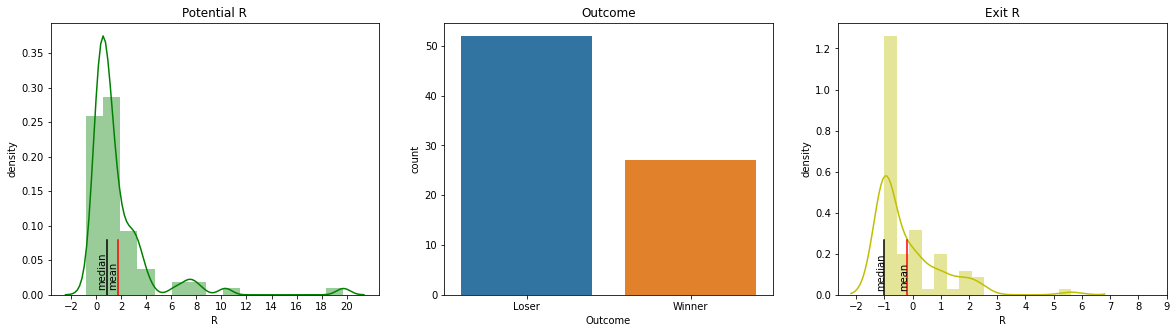

In [22]:




f,axes=plt.subplots(1,3,figsize=(20,5))

# first plot
g1 = sns.distplot(a=target_data[["Potential R"]],bins = 15,ax = axes[0] ,color="g")
axes[0].set_xticks(np.arange(-2,21,2))
axes[0].axvline(x=target_data["Potential R"].mean(),color = "r", ymin=0, ymax=0.2)
axes[0].text(target_data["Potential R"].mean()-0.8,0.01,'mean',rotation=90)
axes[0].axvline(x=target_data["Potential R"].median(),color = "black", ymin=0, ymax=0.2)
axes[0].text(target_data["Potential R"].median()-0.8,0.01,'median',rotation=90)
axes[0].set_xlabel('R')
axes[0].title.set_text('Potential R')
axes[0].set_ylabel('density')



# seocnds plot
g2 = sns.countplot(x="Outcome",data=target_data,ax=axes[1])
axes[1].title.set_text('Outcome')

# third plot
g3 = sns.distplot(a=target_data[["Exit R"]],bins = 15,ax = axes[2],color = "y")
axes[2].axvline(x=target_data["Exit R"].median(),color = "black", ymin=0, ymax=0.2)
axes[2].text(target_data["Exit R"].median()-0.3,0.03,'median',rotation=90)
axes[2].axvline(x=target_data["Exit R"].mean(),color = "r", ymin=0, ymax=0.2)
axes[2].text(target_data["Exit R"].mean()-0.3,0.03,'mean',rotation=90)
axes[2].set_xticks(range(-2,10))
axes[2].title.set_text('Exit R')
axes[2].set_ylabel('density')
axes[2]=axes[2].set_xlabel('R')


##### Inference:



As one can see, we get a skewed distribution in both 'Exit R' and 'Potential R' with some outliers in the far right.
A trade with a high R is considered a good trade which is which we will reduce the outliers to a price which is still high but not too high to avoid falsley manipulating our analysis and models.

In the next cell we'll lower high values above 10 in 'Potential R'  to 10 and high values above 4 in 'Exit R' to 4, and after we are finished with the EDA we'll standardize the data.




##### Plot the changes:

In [23]:
target_data1 = target_data.copy()

target_data1["Potential R"] = target_data1["Potential R"].apply(lambda x: 10 if x>10 else x)
target_data1["Exit R"] = target_data1["Exit R"].apply(lambda x: 4 if x>4 else x)

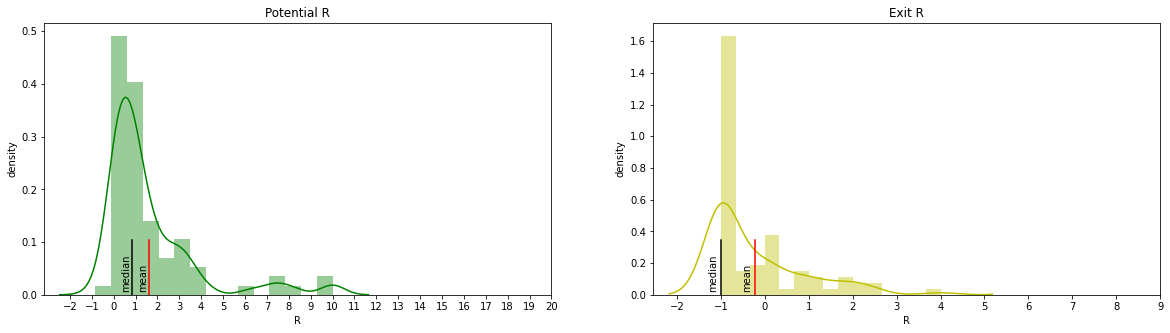

In [24]:
f,axes=plt.subplots(1,2,figsize=(20,5))

# first plot
g1 = sns.distplot(a=target_data1[["Potential R"]],bins = 15,ax = axes[0] ,color="g")
axes[0].set_xticks(range(-2,21))
axes[0].axvline(x=target_data1["Potential R"].mean(),color = "r", ymin=0, ymax=0.2)
axes[0].text(target_data1["Potential R"].mean()-0.5,0.01,'mean',rotation=90)
axes[0].axvline(x=target_data1["Potential R"].median(),color = "black", ymin=0, ymax=0.2)
axes[0].text(target_data1["Potential R"].median()-0.5,0.01,'median',rotation=90)
axes[0].title.set_text('Potential R')
axes[0].set_ylabel('density')
axes[0].set_xlabel('R')

# second plot
g2 = sns.distplot(a=target_data1[["Exit R"]],bins = 15,ax = axes[1],color = "y")
axes[1].axvline(x=target_data1["Exit R"].median(),color = "black", ymin=0, ymax=0.2)
axes[1].text(target_data1["Exit R"].median()-0.3,0.03,'median',rotation=90)
axes[1].axvline(x=target_data1["Exit R"].mean(),color = "r", ymin=0, ymax=0.2)
axes[1].text(target_data1["Exit R"].mean()-0.3,0.03,'mean',rotation=90)
axes[1].set_xticks(range(-2,10))
axes[1].title.set_text('Exit R')
axes[1].set_ylabel('density')
axes[1] =axes[1].set_xlabel('R')

<a id=7.2></a>

### 7.2) Core Data

In [25]:
core_data.describe()

Download      Entry       Exit  Intended Entry         SL        Num  \
count      79.0  79.000000  79.000000       79.000000  79.000000  79.000000   
mean        1.0   6.353165   6.329873        6.353165   6.174051  40.000000   
std         0.0   4.012418   4.020415        4.012418   3.922988  22.949219   
min         1.0   1.150000   1.110000        1.150000   1.110000   1.000000   
25%         1.0   2.805000   2.775000        2.805000   2.705000  20.500000   
50%         1.0   5.650000   5.420000        5.650000   5.420000  40.000000   
75%         1.0   9.235000   9.160000        9.235000   8.940000  59.500000   
max         1.0  15.130000  15.440000       15.130000  14.850000  79.000000   

       Potential  
count  79.000000  
mean    6.674443  
std     4.247613  
min     1.190000  
25%     3.073500  
50%     5.920000  
75%     9.792500  
max    16.120000

<a id=7.2.1></a>

#### 7.2.1) Entry

Here we exhibit the relationship between the entry price and the outcomes.

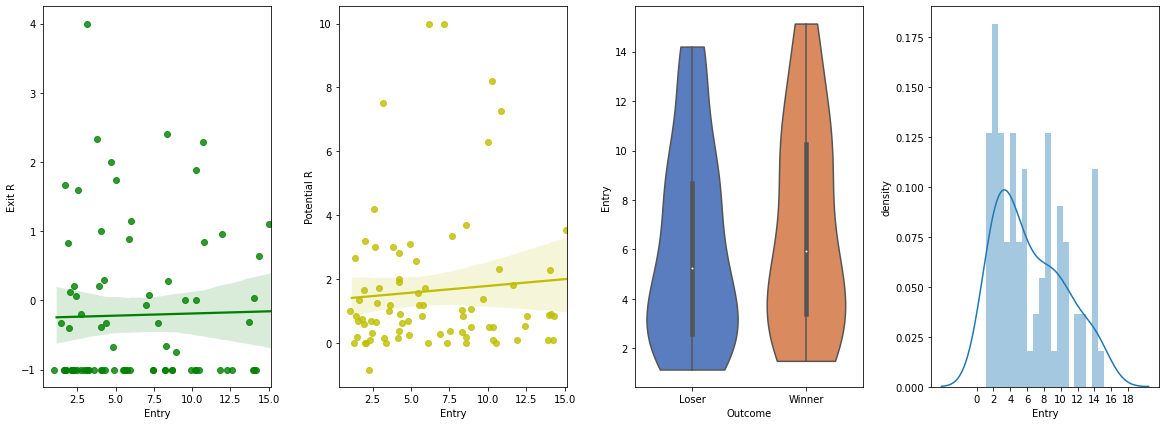

In [26]:
temp = core_data[["Num","Entry"]].copy()

temp = temp.merge(target_data1[["Num","Outcome","Potential R","Exit R"]],on = ["Num"], how = "inner")


fig,ax = plt.subplots(1,4 ,figsize = (20,7))
fig.subplots_adjust(wspace=0.3)

ax[0] = sns.regplot(x="Entry", y="Exit R", data=temp,ax = ax[0],x_jitter=.2, color = "g")

ax[1] = sns.regplot(x="Entry", y="Potential R", data=temp,ax = ax[1],x_jitter=.2, color = "y")


ax[2] = sns.violinplot(x="Outcome", y="Entry",data=temp, palette="muted",cut = 0,ax = ax[2])

ax[3] = sns.distplot(a=temp[['Entry']],bins = 20,ax = ax[3])
ax[3].set_xticks(np.arange(0,20,2))
ax[3].set_ylabel('density')
ax[3] = ax[3].set_xlabel('Entry')



##### Inference:

In is very difficult to draw inference from the plots because the regression presents a flat line while the observations are scattered with no bias. Also the violin plot for 'Winner' and 'Loser' seem to be very similar.

We'll normalize the 'Entry' values.

<a id=7.2.2></a>

#### 7.2.2) Pattern (in progress)

<a id=7.2.3></a>

#### 7.2.3) VWAP Tag (in progress)

<a id=7.2.4></a>

#### 7.3.4) Catalyst (in progress)

<a id=7.3></a>

### 7.3) Fundamentals

In [27]:
fundamentals.describe()

priceToBook   floatShares  heldPercentInsiders  \
count    38.000000  5.900000e+01            61.000000   
mean      4.702171  6.343655e+07             0.206348   
std       4.275260  8.857918e+07             0.220826   
min       0.979892  4.429750e+05             0.000000   
25%       1.627947  1.234991e+07             0.030000   
50%       3.119016  3.130148e+07             0.118510   
75%       6.248779  8.718068e+07             0.342900   
max      19.191729  5.292242e+08             0.896040   

       heldPercentInstitutions     marketCap  netIncomeToCommon  \
count                61.000000  6.200000e+01       6.000000e+01   
mean                  0.242618  6.266069e+08      -8.947328e+07   
std                   0.251351  8.986754e+08       2.721377e+08   
min                   0.000000  2.181109e+07      -2.012417e+09   
25%                   0.037020  7.852331e+07      -6.378450e+07   
50%                   0.178060  2.415489e+08      -2.294050e+07   
75%                   0.357430  6.913933e+08      -4.196131e+06   
max                   1.057870  4.512335e+09       7.498300e+07   

       sharesOutstanding   sharesShort  shortPercentOfFloat  \
count       6.200000e+01  6.200000e+01            49.000000   
mean        8.401325e+07  5.005996e+06             0.064082   
std         9.202207e+07  8.310365e+06             0.053494   
min         7.719620e+05  5.382000e+03             0.000600   
25%         2.155658e+07  1.828802e+05             0.016000   
50%         5.277310e+07  1.323531e+06             0.058900   
75%         1.147310e+08  6.178836e+06             0.093800   
max         5.303650e+08  3.850428e+07             0.211600   

       enterpriseToEbitda  
count           58.000000  
mean           -12.287431  
std             36.493133  
min           -146.242000  
25%            -13.652750  
50%             -5.002500  
75%              0.013500  
max             73.638000

<a id=7.4></a>

### 7.4) Critical Data

In [28]:
critical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34320 entries, 0 to 34319
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Symbol               34320 non-null  object 
 1   Num                  34320 non-null  int32  
 2   Date                 34320 non-null  object 
 3   Gap                  34320 non-null  object 
 4   spy_Gap              34320 non-null  object 
 5   Sum Volume at Entry  34320 non-null  float64
 6   Sum Volume 66        34320 non-null  float64
 7   RV at Entry 66       34320 non-null  float64
dtypes: float64(3), int32(1), object(4)
memory usage: 2.2+ MB


#### 7.4.1) Gap (in progress)

#### 7.4.2) SPY Gap (in progress)

#### 7.4.3) Sum Volume at Entry (in progress)

#### more features in progress...

<a id=8></a>

## 8) Dimensionality Reduction

As seen in the EDA section some features seems to have no impact on the target variables, here we would like to filter some of the feature creating a framework for modeling.

<a id=9></a>

## 9) Modeling

The main purpose of this section is to analyze the feature's impact on the trade's outcome in terms of risk rewars ratio (R) and a binary outcome (winner or loser). We will try to create prediction models for better decision making in live trading, which will act later as filters for a systematic approach - algo trading.

In [29]:
df_model = core_data.copy()
df_model = df_model.merge(target_data, on = ['Symbol','Date','Num'])
df_model = df_model.merge(fundamentals, on = ['Symbol','Date'])
df_model = df_model.merge(critical_data, on = ['Symbol','Date', 'Num'])

df_model = df_model.drop(columns = ['Date', 'Download', 'Entry Time', 'Exit', 'Exit Time',
                                    'Intended Entry', 'SL', 'Strategy', 'Symbol',
                                    'Num', 'Potential', 'Potential Time','Outcome'])


#****remove na only for a general model presentation, needs to be removed after preprocessing!!!!!*****
df_model = df_model.dropna(how='any')

discrete = ["sector",'country','Catalyst','VWAP Tag','Pattern']



In [30]:
df_model  =  pd.get_dummies(df_model,columns = discrete, prefix=['sector','Catalyst','country', 'Pattern','VWAP Tag'])

<a id=9.1></a>

### 9.1 Classification -  Winner/Loser

In [31]:
y = df_model[["is_winner"]]

# drop the target row and the target rows for the regression models
X = df_model.drop(columns = ["is_winner","Exit R","Potential R"])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
kfold = StratifiedKFold(n_splits=5)


random_state = 3



classifier_dict = {}
classifier_dict["SVC"]=SVC(random_state=random_state)
classifier_dict["Ada Boost"]=AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1)
classifier_dict["Random Forest"]=RandomForestClassifier(random_state=random_state)
classifier_dict["Extra Trees"] = ExtraTreesClassifier(random_state=random_state)
classifier_dict["Desicion Tree"] = DecisionTreeClassifier(random_state=random_state)
classifier_dict["Logistic Regression"] =LogisticRegression(random_state=random_state)


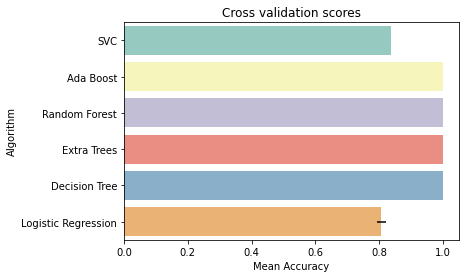

In [33]:
cv_results = []
for clf in classifier_dict :
    cv_results.append(cross_val_score(classifier_dict[clf], X_train, y =   y_train.values.flatten(), scoring = "accuracy", cv = kfold))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","Ada Boost","Random Forest","Extra Trees","Decision Tree","Logistic Regression"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [34]:
for clf in classifier_dict :
    print(clf + " Accuracy:")
    model = classifier_dict[clf].fit(X_train, y_train.values.flatten())
    score = model.score( X_test, y_test)
    print(score)

SVC Accuracy:
0.8257491675915649
Ada Boost Accuracy:
1.0
Random Forest Accuracy:
1.0
Extra Trees Accuracy:
1.0
Desicion Tree Accuracy:
1.0
Logistic Regression Accuracy:
0.8017018128005919


<a id=9.2></a>

### 9.2) Regression - Risk Reward Ration (R)

In [35]:

regression_dict = {}
classifier_dict["Linear Regression"] =LinearRegression()

### 9.3) Hyper Paramater Tuning

<a id=10></a>

## 10) Optimization and Conclusions

In this section we will attempt to optimize the strategy using a different set of rules, and calculate the mean and median 'Realized R' and use them as an indicator.

### 10.1 Set and Forget at k R

A simple set and forget strategy with take profit at k R, else consier it a loser trade with R = -1.




In [36]:

def SandF(data,k):
    k = round(k,1)

    data["realized R" + str(k)] = data["Potential R"].apply(lambda x: k if x>=k else -1)

    mean = data["realized R"+str(k)].mean()
    std = data["realized R"+str(k)].std()
    median = data["realized R"+str(k)].median()
    return [mean,median,std]

opt = target_data1[["Date","Symbol","Num","Potential R"]].copy().reset_index()

grid_k = np.arange(0.5,10,0.1)
SandF_df = pd.DataFrame(columns = ["mean","median","std"])
for k in grid_k:

    result = SandF(opt,k)
    SandF_df=SandF_df.append({"k":k,'mean': result[0],"median":result[1],"std":result[2]}, ignore_index=True)
    

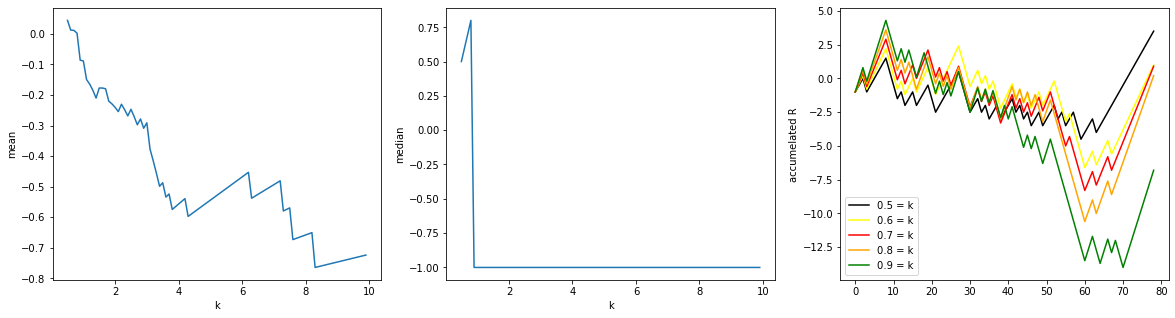

In [37]:
f,axes=plt.subplots(1,3,figsize=(20,5))

g1 = sns.lineplot(data=SandF_df, x="k", y="mean",ax = axes[0])
g2 = sns.lineplot(data=SandF_df, x="k", y="median",ax = axes[1])


top_5 = SandF_df.sort_values("mean",ascending = False).head(5)
color=[ "black","yellow","red","orange","green"]
color_i = 0

for k in top_5["k"]:
    k = round(k,1)   
    opt["Sum realized R"+str(k)] = opt["realized R"+str(k)].rolling(len(opt),min_periods = 1).sum()
    g3 = sns.lineplot(data=opt, x=opt.index, y="Sum realized R"+str(k),ax = axes[2],color =color[color_i])
    color_i = color_i+1
    
top_5["k"]  =  top_5["k"].round(1).apply(lambda x:str(x)+" = k") 
g3.legend(top_5["k"])

g3 =g3.set_ylabel("accumelated R")
    
    

In [38]:
target_data1

Symbol  Num        Date    Exit R  Potential R Outcome  is_winner
0    CPRX    1  2021-03-22 -1.000000        0.250   Loser          0
1    KXIN    2  2021-03-22  2.333333        3.000  Winner          1
2     SDH    3  2021-03-22  2.000000        3.100  Winner          1
3    JFIN    4  2021-03-24 -1.000000        0.079   Loser          0
4    PIXY    5  2021-03-24  4.000000        7.500  Winner          1
..    ...  ...         ...       ...          ...     ...        ...
74   NEPT   75  2021-04-28 -0.333333        1.333   Loser          0
75   NEPT   76  2021-04-28  1.666667        2.667  Winner          1
76   ADMA   77  2021-04-28  1.600000        4.200  Winner          1
77   CLOV   78  2021-04-28  1.882353        6.294  Winner          1
78     JG   79  2021-04-28 -0.333333        0.918   Loser          0

[79 rows x 7 columns]

#### Conditional Set and Forget a k R (in progress)

#### Set and Forget at k R with break even limit (Less Risk):
Similar to Set and Forget at k where k is take profit, here we include another feature to limit our risk.
Break even limit means that if price bypassed a certain R , say limit=1,1.5,2... and then goes straight back to entry price, then exit at entry price + 0.01 $ buffer (to potentially cover comissions and a security buffer), this way we limit our risk and avoid price reaching the stop loss. 

We create a grid of limits with limits of 1,1.5 and 2 with a similar grid for k as seen in the Set and Forget method above.



In [39]:
opt = core_data[["Date","Symbol","Num","SL","Entry","Catalyst","VWAP Tag"]].copy()
opt =opt.merge(target_data1[["Num","Potential R"]], on = ["Num"],how = "inner")


In [40]:


def PotentialWithLk(data,limit,k):
    k = round(k,1)
    limit = round(limit,1)

    data["limit "+str(limit)+" k "+str(k) ] = 0
    data["limit "+str(limit)+" k "+str(k)  + " R"] = 0
    data["limit "+str(limit)+" k "+str(k) + " Time"]=0

    q1 = df_merged[(df_merged["Entry Time"]<=df_merged["Time"]) ].copy()


    for num in data["Num"].unique():
    
        q2 = q1[q1["Num"] ==num].reset_index()

    
        flag_above_limit = 0
        potential = 0
        potential_index = 0
        for index, row in q2.iterrows():


            if row["High R"]>potential:
                potential_index = index
                potential = row["High R"]

                
                if potential>=k:
                    potential =k
                    break

            #create some buffer
            if index>1:
                if potential>=limit and flag_above_limit == 0 :
                    flag_above_limit = 1

            
        
            if row["Low"]<=(row["Entry"]+0.01) and flag_above_limit == 1 :
                potential = 0
                break
            if row["Low"]<=row["SL"]:
                potential = -1
                break

        if potential!= -1 or potential!= 0:
            data.loc[data["Num"]==num,"limit "+str(limit)+" k "+str(k) ]= q2.loc[potential_index,"High"]
            data.loc[data["Num"]==num,"limit "+str(limit)+" k "+str(k) + " R"] = potential
            data.loc[data["Num"]==num,"limit "+str(limit)+" k "+str(k)+ " Time"] = q2.loc[potential_index,"Time"]
        else:
            data.loc[data["Num"]==num,"limit "+str(limit)+" k "+str(k) ]= q2.loc[potential_index,"High"]
            data.loc[data["Num"]==num,"limit "+str(limit)+" k "+str(k) + " R"] = potential
            data.loc[data["Num"]==num,"limit "+str(limit)+" k "+str(k)+ " Time"] = q2.loc[index,"Time"]
            
        
        
    mean = data["limit "+str(limit)+" k "+str(k) + " R"].mean()
    std = data["limit "+str(limit)+" k "+str(k) + " R"].std()
    median = data["limit "+str(limit)+" k "+str(k) + " R"].median()

    return [mean,median,std]

 

In [41]:
grid_k = np.arange(0.5,10,0.2)
grid_limit = np.arange(1,2.5,0.5)
SandF_df = pd.DataFrame(columns = ["mean","median","std"])
for k in grid_k:
    for limit in grid_limit:
        if k>limit:

            result =PotentialWithLk(opt,limit,k)
            SandF_df=SandF_df.append({"k":k,"limit":limit,'mean': result[0],"median":result[1],"std":result[2]}, ignore_index=True)

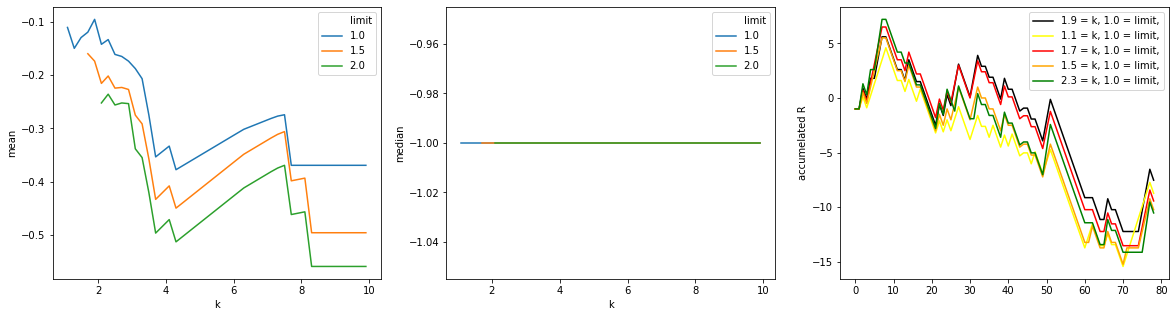

In [42]:
f,axes=plt.subplots(1,3,figsize=(20,5))

temp = SandF_df.copy()
temp["limit"] = temp["limit"].astype('category')
g1 = sns.lineplot(data=temp, x="k", y="mean",hue="limit",ax = axes[0])
g2 = sns.lineplot(data=temp, x="k", y="median",hue="limit",ax = axes[1])


top_5 = SandF_df.sort_values("mean",ascending = False).head(5)
color=[ "black","yellow","red","orange","green"]
color_i = 0

for index, row in top_5.iterrows():
    k = round(row["k"],1)   
    limit = round(row["limit"],1) 
    opt["Sum Realized limit "+str(limit)+" k "+str(k) + " R"] = opt["limit "+str(limit)+" k "+str(k) + " R"].rolling(len(opt),min_periods = 1).sum()
    g3 = sns.lineplot(data=opt, x=opt.index, y="Sum Realized limit "+str(limit)+" k "+str(k) + " R",ax = axes[2],color =color[color_i])
    color_i = color_i+1
    
top_5["limit_k"]  =  top_5.round(1).apply(lambda x:str(x["k"])+" = k, "+str(x["limit"])+" = limit,",axis = 1) 
g3.legend(top_5["limit_k"])

g3 =g3.set_ylabel("accumelated R")

##### Conditional Set and Forget with L-k (limit k R) (in progress)